<a href="https://colab.research.google.com/github/Massittha/Data-portfolio/blob/main/hw02_classATM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW02: ATM Class

I created this ATM class in an attempt to mimic how an ATM machine works. It is part of my practice of creating a class in python. \
\
The class takes in bank's name and card_info as its arguments.
An example of `card_info` is as follow

    card_info = { "1": {"pin": "111111", "balance": 10000, "status": "normal"},
                  "2": {"pin": "222222", "balance": 20000, "status": "normal"}}

The keys 1 and 2 can be of your choice, but the rest should remain in the same format as above for the class to work properly.


You can try creating an ATM object and give it a bank name and parse in card_info. For example:
`atm = ATM("PythonClass",card_info)`\
Then try using login method `atm.login()`. The method will ask you to enter the card id and the PIN.
The card id are the keys (1 and 2) and the PINs are 111111, and 222222 respectively by default.

You can edit details about the cards or also add other cards in the dictionary `self.__card_info` keeping the original format.

    self.__card_info = { "1": {"pin": "111111", "balance": 10000, "status": "normal"},
                         "2": {"pin": "222222", "balance": 20000, "status": "normal"}}

`"status": "normal"` suggests the card is usable. It remains normal until wrong PIN input limit reached and it changes to `"blocked"`

You may find the cash in the machine is running out. In that case, use the method `atm.fill_cash()` to fill the cash. It takes in the number of 100 THB, 500 THB, and 1000 THB bank notes\
\
Each transaction will be logged and saved in the file `transaction_log.csv` which you can also view using method `atm.showlog()`

**Example:** 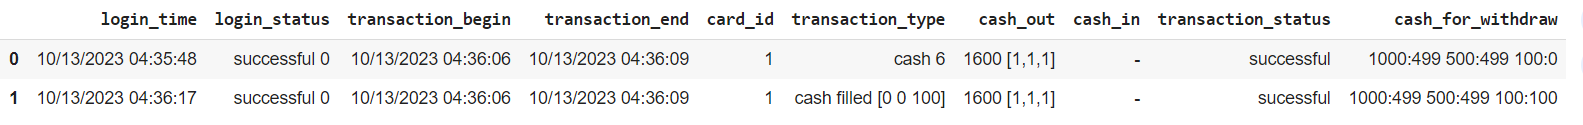


Please feel free to play with it.

In [ ]:
class ATM:

    def __init__(self,bank,card_info):
        self.bank = bank
        self.__cash_available = { "100" : 1, "500" : 500, "1000" : 500 }
        self.__card_info = card_info
        self.__log_header()


    def login(self):

        self.__login_time = self.__timestamp()
        self.__transaction_begin = None
        self.__transaction_end = None
        self.__transaction_type = None
        self.__cash_out_log = None
        self.__cash_in = None
        self.__transaction_status = None

        self.__card_id = input("card ID: ")

        try:
            self.__card_info[self.__card_id]
        except KeyError:
            print("Card invalid! Please check your card.")
            self.__login_status = "card invalid"
            self.__log_record()
            return

        if self.__card_info[self.__card_id]["status"] == "blocked":
            print("Your card has been blocked. Please contact the bank.")
            self.__login_status = "blocked but tried to login"
            self.__log_record()
            return


        pin = input("Enter your PIN: ")

        wrongpin = 0
        attempts = 4

        while True:

            if self.__card_info[self.__card_id]["pin"] == pin:
                self.__login_status = f"successful {wrongpin}"
                self.__menu()
                break


            else:
                wrongpin += 1
                if wrongpin == 4:
                    print("Your card has been blocked, please contact the bank\n")
                    self.__card_info[self.__card_id]["status"] = "blocked"
                    self.__login_status = "wrong password limit blocked"
                    self.__log_record()
                    break

                str_attempts = "attempts"
                if attempts-wrongpin == 1:
                    str_attempts = "attempt"
                warning = f"Warning! Wrong pin.\nYou have {attempts-wrongpin} more {str_attempts} to re-enter your pin\n"
                print(warning)
                pin = input("Please re-enter your pin: ")


        return

    def fill_cash(self,add100=100,add500=100,add1000=100):

        if add100 >= 0 and add500 >= 0 and add1000 >= 0:

            self.__cash_available["100"] += add100
            self.__cash_available["500"] += add500
            self.__cash_available["1000"] += add1000
            print("cash filled to the machine: ")
            print("100 THB: ",add100)
            print("500 THB: " , add500)
            print("1000 THB: ", add1000)

            self.__login_time = self.__timestamp()
            self.__login_status = None
            self.__transaction_begin = None
            self.__transaction_end = None
            self.__card_id = "staff"
            self.__cash_out_log = None
            self.__cash_in = None
            self.__transaction_type = f"cash filled [{add1000} {add500} {add100}]"
            self.__transaction_status = "successful"

            self.__log_record()
        else:
            print("Incorrect input")




    def __menu(self):

        print(f"\nWelcome to {self.bank}\nPlease select your transaction")
        print("1 Transfer       2 Cash")
        print("3 Deposit        4 Balance inquiry")
        print("5 Change PIN     6 Cancel")

        while True:
            self.__button = input("Press the button: ")
            if self.__button in ["1","2","3","4","5","6"]:
                break
            else:
                print("Invalid input")

        match self.__button:
            case "1":
                self.__transaction_begin = self.__timestamp()
                self.__transfer()
            case "2":
                self.__transaction_begin = self.__timestamp()
                self.__cash()
            case "3":
                self.__transaction_type = "deposit"
                self.__transaction_begin = self.__timestamp()
                self.__deposit()
            case "4":
                self.__transaction_type = "balance_inquiry"
                self.__transaction_begin = self.__timestamp()
                self.__balance_inquiry()
            case "5":
                self.__transaction_type = "change_pin"
                self.__transaction_begin = self.__timestamp()
                self.__change_pin()
            case "6":
                self.__transaction_type = "cancelled no transaction"
                self.__log_record()
                self.__exit()




    def __transfer(self):
        print("transfer")
        while True:
            input("Please enter the account number (Assume entered correctly)\nType anything here:  ")
            amount = input("Please enter your amount: ")
            if amount.isnumeric() and int(amount) > 0:
                amount =  int(amount)
                break
            else:
                print("Invalid input")

        if 0 < amount > self.__card_info[self.__card_id]["balance"]:
            self.__transaction_status = "failed: balance limit"
            self.__log_record()
            print("There is no sufficient balance in your account.")
            print("Would you like to continue?")
            if self.__yesno():
                self.__transfer()
            else:
                self.__exit()

        else:
            print("Would you like to confirm the amount?")
            if self.__yesno():
                self.__card_info[self.__card_id]["balance"] -= amount
                print("Your amount has been transferred")
                print("Your remaining balance: ",self.__card_info[self.__card_id]["balance"])
                self.__transaction_type = f"transfer {amount}"
                self.__transaction_status = "successful"
                self.__exit()
                return amount
            else:
                print("Your transfer has been cancelled.\n")
                self.__transaction_type = "transfer"
                self.__transaction_status = "cancelled"
                self.__log_record()
                self.__doneyet()





    def __cash(self):
        print("\ncash")
        button = {"1": 100,
                  "2": 200,
                  "3": 500,
                  "4": 1000,
                  "5": 2000}
        while True:
            print("Please select your amount: ")
            print("1) 100 THB   2) 200 THB")
            print("3) 500 THB   4) 1000 THB")
            print("5) 2000 THB  6) Specify amount")
            print("7) Cancel")
            select = input("Press the button: ")

            self.__transaction_type = f"cash {select}"

            if select in ["1","2","3","4","5"]:
                amount = button[select]
                break
            elif select == "6":
                while True:
                    amount = input("Please enter your amount: ")
                    if amount.isnumeric():
                        amount = int(amount)
                        break
                    else:
                        print("Invalid input")

                break
            elif select == "7":
                self.__transaction_status = "cancelled"
                self.__log_record()
                self.__exit()
                return
            else:
                print("Invalid input")


        self.__cashout(amount)


    def __deposit(self):
        print("\ndeposit")
        while True:
            depo = input("Please insert your cash (assume you really put the cash into the machine): ")
            if depo.isnumeric() and int(depo) > 0 and \
               (int(depo)%20 == 0 or int(depo)%50 == 0 or int(depo)%100 == 0 or int(depo)%500 == 0 or int(depo)% 1000 == 0):

                depo = int(depo)
                print("Your entered amount is: ", depo )
                print("Would you like to confirm the deposit?:")
                if self.__yesno():
                    self.__card_info[self.__card_id]["balance"] += int(depo)
                    print("Deposit successful\n")
                    self.__cash_in = depo
                    self.__transaction_status = "successful"
                    self.__exit()
                    return
                else:
                    print("Please take back your cash")
                    self.__transaction_status = "cancelled"
                    self.__log_record()
                    self.__exit()
                    return

            else:
                print("Invalid input, you can only insert 20 50 100 500 or 1000 THB")

    def __balance_inquiry(self):
        print("\nBalance inquiry")

        print("Your balance: ",self.__card_info[self.__card_id]["balance"])
        self.__transaction_status = "balance shown"
        self.__transaction_end = self.__timestamp()
        self.__log_record()

        self.__doneyet()





    def __change_pin(self):
        print("\nChange PIN")

        while True:

            while True:
                newpin_1 = input("Enter your new PIN: ")
                if len(newpin_1) == 6 and newpin_1.isnumeric():
                    break
                else:
                    print("Invalid input")

            while True:
                newpin_2 = input("Confirm your new PIN: ")
                if len(newpin_1) == 6 and newpin_2.isnumeric():
                    break
                else:
                    print("Invalid input")

            if newpin_1 == newpin_2:
                self.__card_info[self.__card_id]["pin"] = newpin_1
                print("Your PIN has been changed.\n")
                self.__transaction_status = "PIN changed"
                self.__transaction_end = self.__timestamp()
                self.__log_record()
                self.__exit()
                return

            else:
                print("PIN unmatched")



    def __cashout(self,amount):
        #check balance
        if self.__card_info[self.__card_id]["balance"] < amount:
            print("There is no sufficient amount in your balance")
            self.__transaction_status = "insufficient balance"
            self.__log_record()
            self.__doneyet()
            return
        # check cash available

        count = self.__cash_available.copy()
        avail_1000 = count["1000"]
        avail_500 = count["500"]
        avail_100 = count["100"]

        available = [avail_1000,avail_500,avail_100]
        banknotes = [1000,500,100]

        #check supply
        if avail_100+avail_500+avail_1000 == 0:
            print("No cash available")
            self.__exit()
            return

        elif 100*avail_100 + 500*avail_500 + 1000*avail_1000 >= amount:
            pass
        else:
            print("Insufficient cash available for your requested amount")
            self.__transaction_status = "insufficient cash in machine"
            self.__log_record()
            self.__doneyet()
            return


        for num in count:
            if count[num] == 0:
                banknotes.remove(int(num))


        # minimum banknotes to giveout
        cashtogiveout = amount
        give_100 = 0
        give_500 = 0
        give_1000 = 0
        for banknote in banknotes:
            while cashtogiveout >= banknote and count[str(banknote)] > 0:
                cashtogiveout -= banknote
                if banknote == 100:
                    give_100 += 1
                elif banknote == 500:
                    give_500 += 1
                else:
                    give_1000 += 1
                count[str(banknote)] -=1

        if cashtogiveout:
            print("We apologize.")
            print("We are unable to provide your amount.\n")

            if cashtogiveout%100 == 0 or cashtogiveout%500 == 0 or cashtogiveout%1000 == 0:
                print("There is shortage of banknotes.")
                print("Available banknotes are: ",end = " ")
                for available in count:
                    if count[available] > 0:
                        print(available,end=" ")
                print("THB\n")
                self.__transaction_status = "cannot provide (shortage)"
                self.__log_record()
                self.__doneyet()


                return


            else:
                print(f"This machine can only provide 100, 500, and 1000 THB banknotes.\n")
                self.__transaction_status = "cannot provide (invalid amount)"
                self.__log_record()
                self.__doneyet()

                return
        print("\nBank notes given: ")
        for banknote,num in zip(["1000","500","100"],[give_1000,give_500,give_100]):
            if num:
                print(f"{banknote}: {num}")

        #deduct amount from user's balance
        self.__cash_available["1000"] -= give_1000
        self.__cash_available["500"] -= give_500
        self.__cash_available["100"] -= give_100

        self.__cash_out = 1000*give_1000 + 500*give_500 + 100*give_100
        self.__card_info[self.__card_id]["balance"] -= self.__cash_out

        print("Please take your cash")
        self.__transaction_status = "successful"
        self.__cash_out_log = f"{self.__cash_out} [{give_1000},{give_500},{give_100}]"

        self.__exit()

        return




    def __exit(self):
        self.__transaction_end = self.__timestamp()
        if self.__transaction_status == "successful":
            self.__log_record()
        print(f"\nThank you for choosing {self.bank}'s service.\nPlease do not forget to take your card.")
        return

    def __yesno(self):
        print("1 Yes    2 No")
        option = input("Press the button: ")
        while True:
            if option in ["1","2"]:
                if option == "1":
                    return True
                else:
                    return False
            else:
                print("Invalid input")

    def __doneyet(self):
        print("\nWould you like to continue using other services?")
        if self.__yesno():
            self.__menu()
            return


        else:
            self.__exit()


    def __timestamp(self):
        from datetime import datetime
        from pytz import timezone
        ct = datetime.now(timezone('Asia/Bangkok'))
        return ct.strftime("%m/%d/%Y  %H:%M:%S")
        #return f"{ct.year}/{ct.month}/{ct.day} {ct.hour}:{ct.minute}:{ct.second}"


    def __log_header(self):
        import csv
        header = ["login_time","login_status",
                  "transaction_begin",
                  "transaction_end",
                  "card_id",
                  "transaction_type",
                  "cash_out",
                  "cash_in",
                  "transaction_status",
                  "cash_for_withdraw"]

        with open('transaction_log.csv','w') as file:
            writer = csv.writer(file)
            writer.writerow(header)

    def __log_record(self):
        import csv
        cash_for_withdraw = \
                f"1000:{self.__cash_available['1000']} 500:{self.__cash_available['500']} 100:{self.__cash_available['100']}"

        record = [self.__login_time,
                  self.__login_status,
                  self.__transaction_begin,
                  self.__transaction_end,
                  self.__card_id,
                  self.__transaction_type,
                  self.__cash_out_log,
                  self.__cash_in,
                  self.__transaction_status,
                  cash_for_withdraw]

        with open('transaction_log.csv','a') as file:
            writer = csv.writer(file)
            writer.writerow(record)


    def showlog(self):
        import pandas as pd
        df = pd.read_csv('transaction_log.csv')
        df= df.fillna(value = "-")
        display(df)




In [ ]:
#an example of card info
#key 1 and 2 can be anything
#but keep the format of pin, balance, and status, the same

card_info = { "1": {"pin": "111111", "balance": 10000, "status": "normal"},
             "2": {"pin": "222222", "balance": 20000, "status": "normal"}}

In [ ]:
#create an ATM object as atm
#bank name: PythonBank
#parse in card_info

atm = ATM("PythonBank",card_info)

In [ ]:
#run the machine
#keep using this method

atm.login()


card ID: 1
Enter your PIN: 111111

Welcome to PythonBank
Please select your transaction
1 Transfer       2 Cash
3 Deposit        4 Balance inquiry
5 Change PIN     6 Cancel
Press the button: 3

deposit
Please insert your cash (assume you really put the cash into the machine): 5920
Your entered amount is:  5920
Would you like to confirm the deposit?:
1 Yes    2 No
Press the button: 1
Deposit successful


Thank you for choosing PythonBank's service.
Please do not forget to take your card.


In [ ]:
#fill the machine with cash
atm.fill_cash(add100 = 100, add500 = 0, add1000 = 0)

cash filled to the machine: 
100 THB:  100
500 THB:  0
1000 THB:  0


In [ ]:
6#show the log of all transactions
atm.showlog()

#login_status: successful 0 => 0 suggests no wrong PIN input, Limit = 4
#cash_out : 1600 [1,1,1] => Amount [no. of 1000 THB, no. of 500 THB, no. of 100 THB]
#cash_for_withdraw => cash available for withdraw in the machine

,login_time,login_status,transaction_begin,transaction_end,card_id,transaction_type,cash_out,cash_in,transaction_status,cash_for_withdraw
0,10/16/2023 03:53:40,successful 0,10/16/2023 03:53:49,10/16/2023 03:53:49,1,balance_inquiry,-,-,balance shown,1000:500 500:500 100:1
1,10/16/2023 03:53:40,successful 0,10/16/2023 03:53:52,10/16/2023 03:53:59,1,cash 6,"1600 [1,1,1]",-,successful,1000:499 500:499 100:0
2,10/16/2023 03:54:07,-,-,-,staff,cash filled [0 0 100],-,-,successful,1000:499 500:499 100:100
3,10/16/2023 03:54:19,successful 2,10/16/2023 03:54:31,10/16/2023 03:54:35,2,change_pin,-,-,PIN changed,1000:499 500:499 100:100
4,10/16/2023 03:54:52,successful 0,10/16/2023 03:55:02,10/16/2023 03:55:19,2,cash 6,"2800 [2,1,3]",-,successful,1000:497 500:498 100:97
5,10/16/2023 03:56:04,successful 0,10/16/2023 03:56:13,10/16/2023 03:56:31,1,deposit,-,5920.0,successful,1000:497 500:498 100:97
